# Machine Learning
## Price Prediction through Linear Regression

#### Objectives:
- Loading the Dataset
- Perform One-hot/ Label Encoding
- Splitting the dataset
- Predicting Price using Linear Regression
- Show: Co-efficients and y-intercept
- Find Prediction error such as  MAE, MAPE, MSE, RMSE, etc
- Compare through visualization

#### Library Importation

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error


import matplotlib.pyplot as plt
import seaborn as sns

# warnings Removal

import warnings

warnings.filterwarnings('ignore')


### Loading the Dataset

In [2]:
df = pd.read_csv("ford.csv")

display(df.head(10))
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


(17964, 8)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [4]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


### One Hot Encoding

In [5]:
df = pd.get_dummies(df, drop_first=True)

#drop first to avoid redundancy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17964 non-null  int64  
 1   price                         17964 non-null  int64  
 2   mileage                       17964 non-null  int64  
 3   mpg                           17964 non-null  float64
 4   engineSize                    17964 non-null  float64
 5   model_ C-MAX                  17964 non-null  uint8  
 6   model_ EcoSport               17964 non-null  uint8  
 7   model_ Edge                   17964 non-null  uint8  
 8   model_ Escort                 17964 non-null  uint8  
 9   model_ Fiesta                 17964 non-null  uint8  
 10  model_ Focus                  17964 non-null  uint8  
 11  model_ Fusion                 17964 non-null  uint8  
 12  model_ Galaxy                 17964 non-null  uint8  
 13  m

#### Separating the features and target variable

In [7]:
# making price the target variable thus
# no needa mention the features

target = ['price']

X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(17964, 32) (17964, 1)


 ### Creating train and test sets

In [8]:
# Here, size of test set is 20% that is 0.2 and 
# random state is selected randomly
# defining random state makes the code reproducible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 32) (3593, 32) (14371, 1) (3593, 1)


### Performing Linear Regression

In [9]:
model = LinearRegression()
model = model.fit(X_train, y_train)

### Co-efficients of the Linear Regression


In [10]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)


,features,coefficients
15,model_ Ka+,-2.969547e+03
26,transmission_Manual,-4.757194e+02
14,model_ KA,-4.506522e+02
31,fuelType_Petrol,-2.254175e+02
27,transmission_Semi-Auto,-1.472017e+02
2,mpg,-7.659271e+01
1,mileage,-6.168294e-02
22,model_ Streetka,2.728484e-12
4,model_ C-MAX,1.086998e+03
0,year,1.123913e+03


### y-intercept of the Linear Regression

In [11]:
model.intercept_

array([-2253986.57309207])

#### Prediction

In [12]:
y_pred = model.predict(X_test)
print(y_pred)

[[14184.68197153]
 [10656.02555946]
 [11867.63422553]
 ...
 [ 6868.41066093]
 [ 8979.27683283]
 [15955.91949667]]


### Error of the Prediction 

In [13]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# # mean absolute percentage error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error= ", MAPE, "%")

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)


mean absolute error =  1376.611796005635
mean absolute percentage error=  0.1467075630677338 %
mean squared error =  3426372.061700212
root mean squared error =  1851.0462073379508
coefficient of determination =  0.8484983735532696


### Comparison through visualization

#### Line Plot

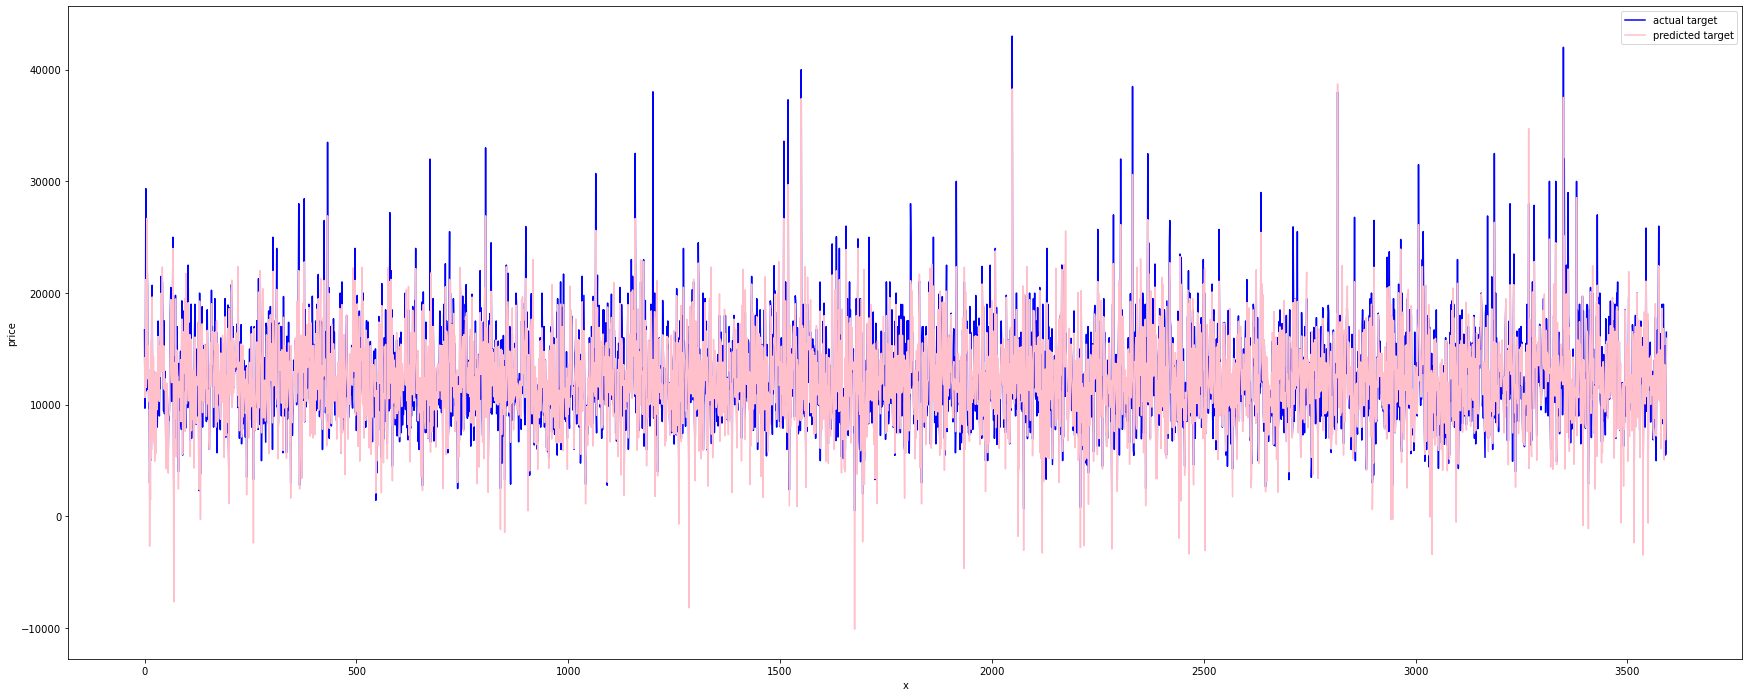

In [14]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target', color='blue')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target', color='pink')
plt.show()

#### Scatterplot

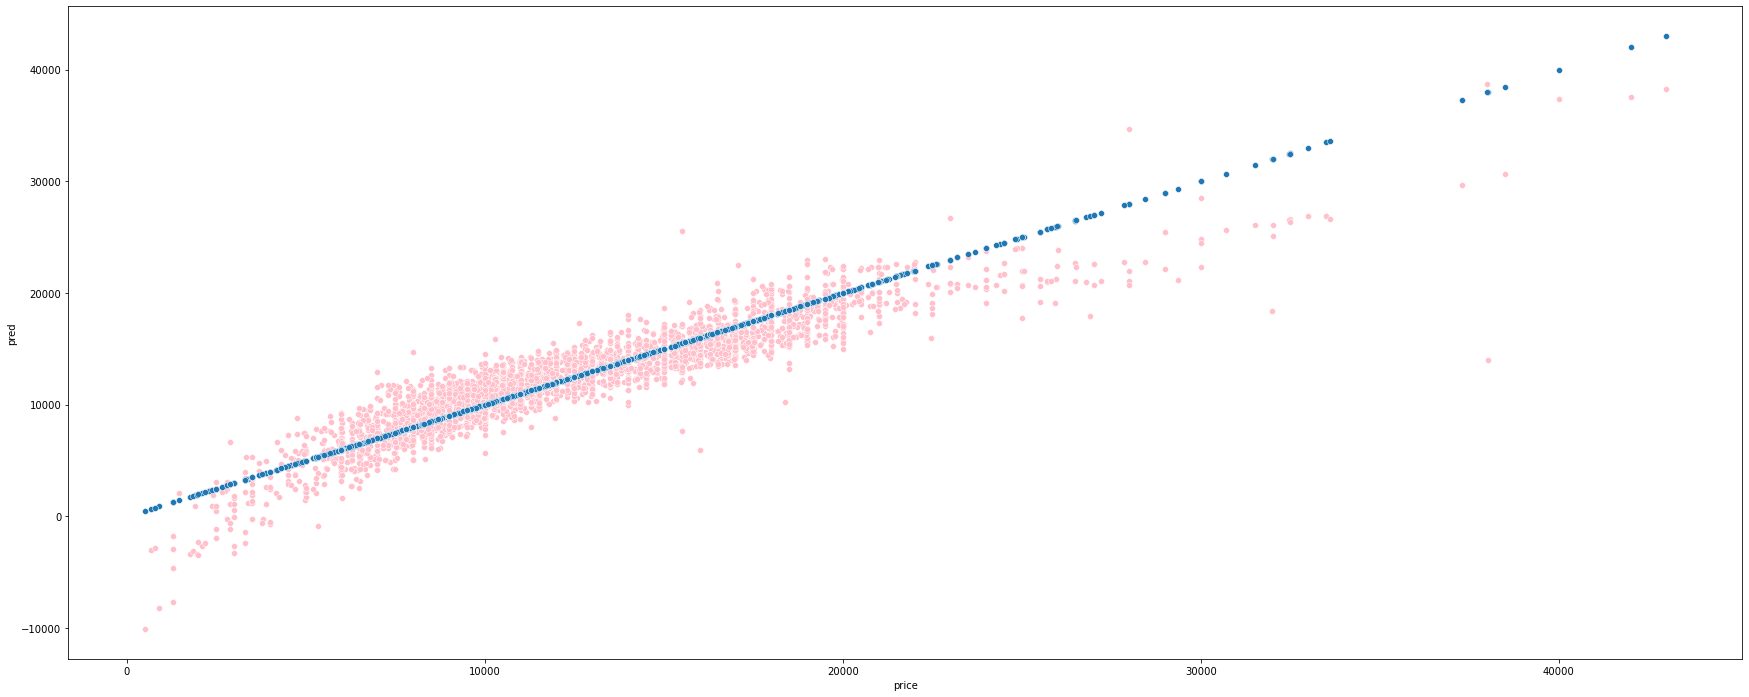

In [15]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test, color='pink')

sns.scatterplot(x='price', y='price', data=y_test)
plt.show()

#### Conclusion
- Thers's room for improvement for the prediction